Aqui é feita uma breve análise de algumas variáveis macroeconômicas relevantes do BACEN. <br>
Tópicos abordados:<br>
- Visualização das séries <br>
- Exemplos com cálculo da inflação acumulada

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from scraper_bacen import bacen_downloader

In [2]:
bacen_dict = bacen_downloader(date_as_index = True)

Baixando dados...
Dados baixados e salvos em formato de dicionário.


Em decorrência das alterações estruturais ocorridas com o Plano Real, foram utilizados os dados disponíveis a partir de 1996 (a implementação foi em 1994, mas houve a defasagem na estabilização das variáveis).

In [3]:
# ITENS NO DICIONÁRIO
for key in bacen_dict.keys():
    print(key)

Dólar
Euro
Libra
Índice nacional de preços ao consumidor-amplo (IPCA)
Índice geral de preços do mercado (IGP-M)
Índice de Preços por Atacado-Mercado (IPA-M)
Índice nacional de custo da construção (INCC)
SELIC
Índice de Atividade Econômica do Banco Central com ajuste sazonal (IBC-BR)
Índice de Atividade Econômica Regional - Região Sul - com ajuste sazonal (IBC-SUL)
Saldo da carteira de crédito em relação ao PIB
Saldo da carteira de crédito com recursos livres a pessoas jurídicas em relação ao PIB
Saldo da carteira de crédito com recursos livres a pessoas físicas em relação ao PIB
Saldo da carteira de crédito com recursos direcionados a pessoas jurídicas em relação ao PIB
Saldo da carteira de crédito com recursos direcionados a pessoas físicas em relação ao PIB
Saldo da carteira de crédito a pessoas jurídicas em relação ao PIB
Saldo da carteira de crédito a pessoas físicas em relação ao PIB


In [24]:
# MUDANDO ESTILO DO GRÁFICO
plt.style.use('fivethirtyeight')  

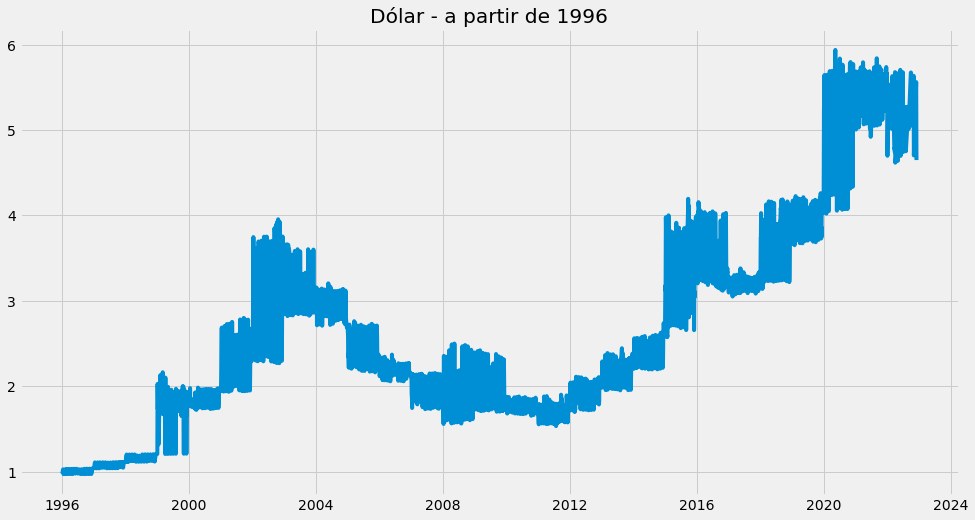

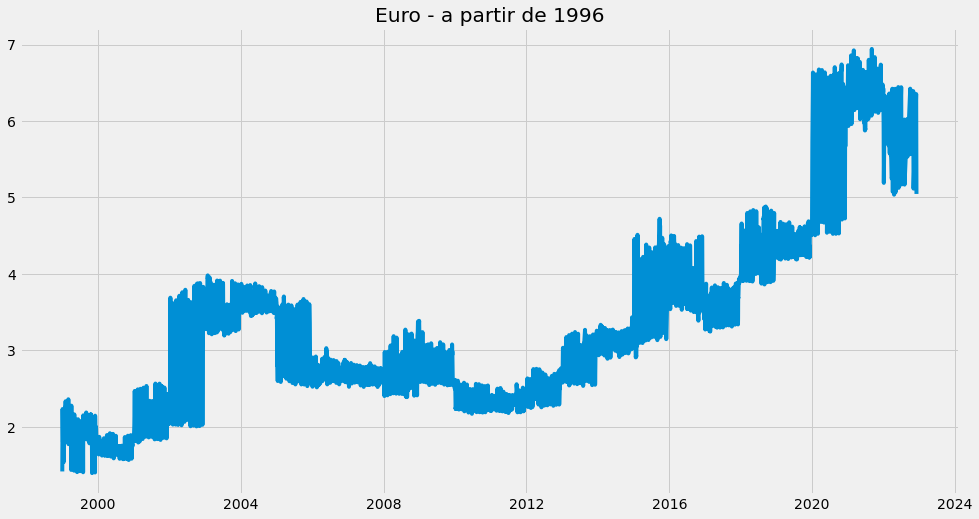

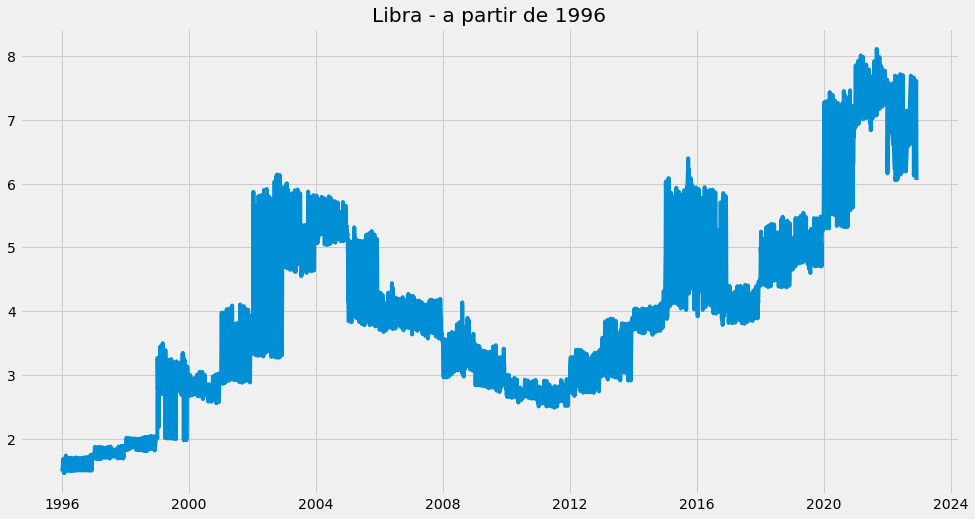

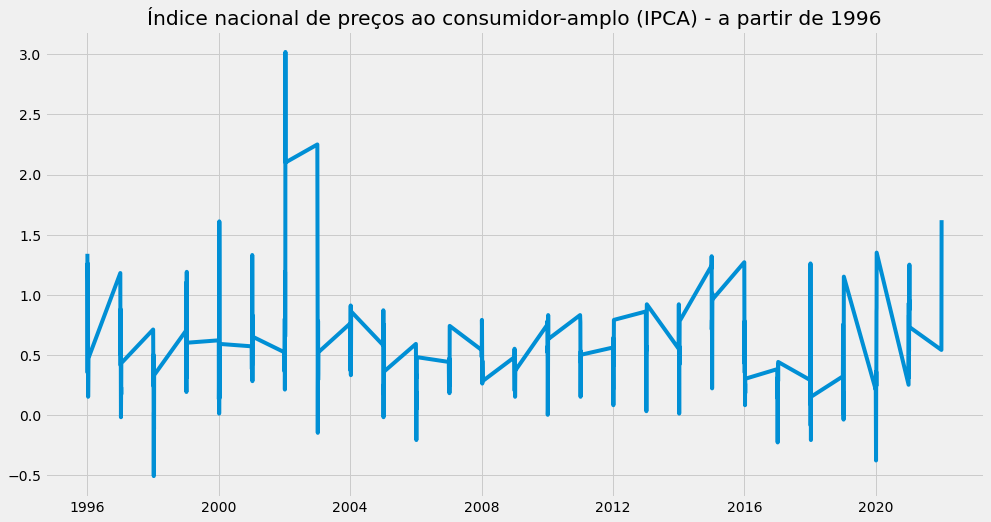

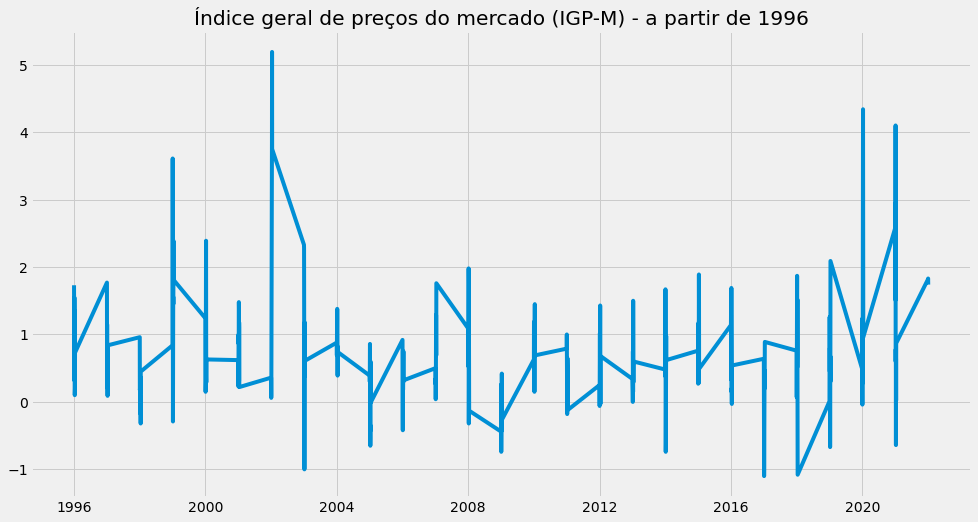

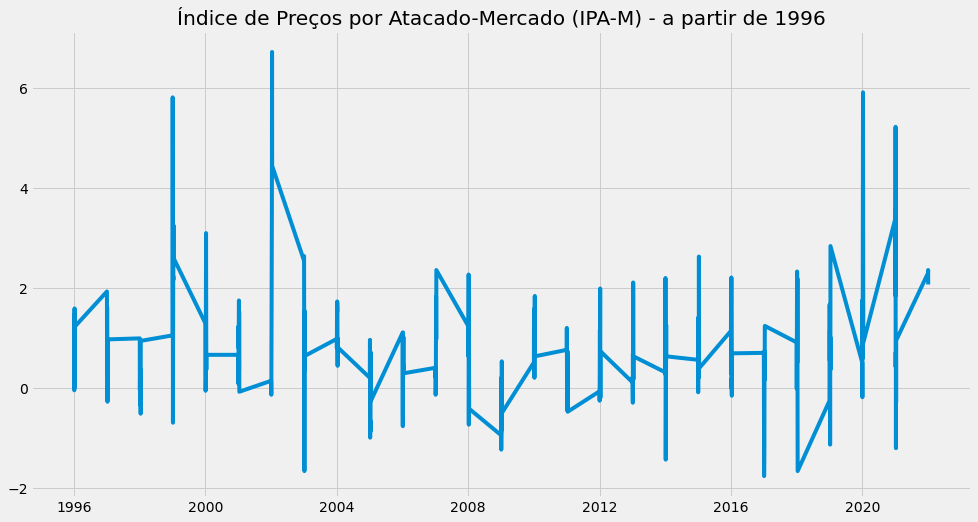

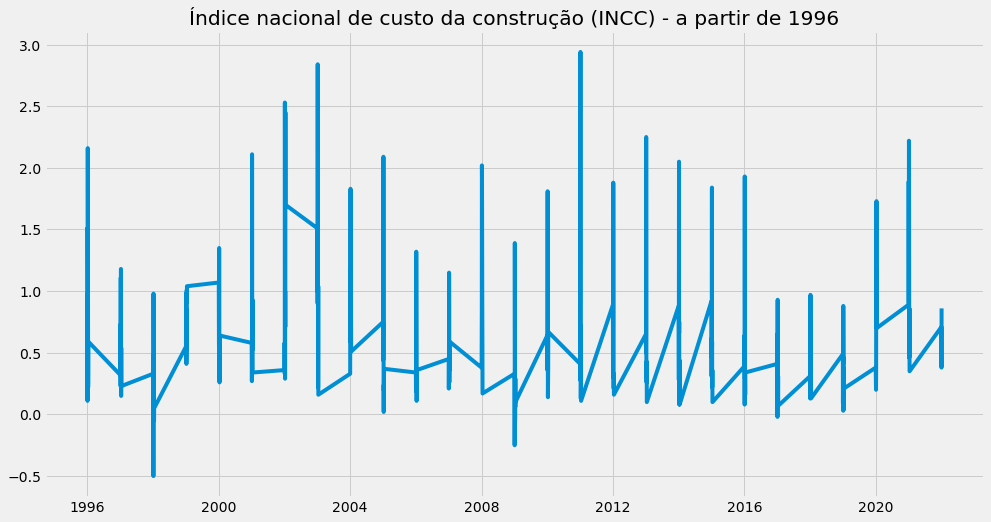

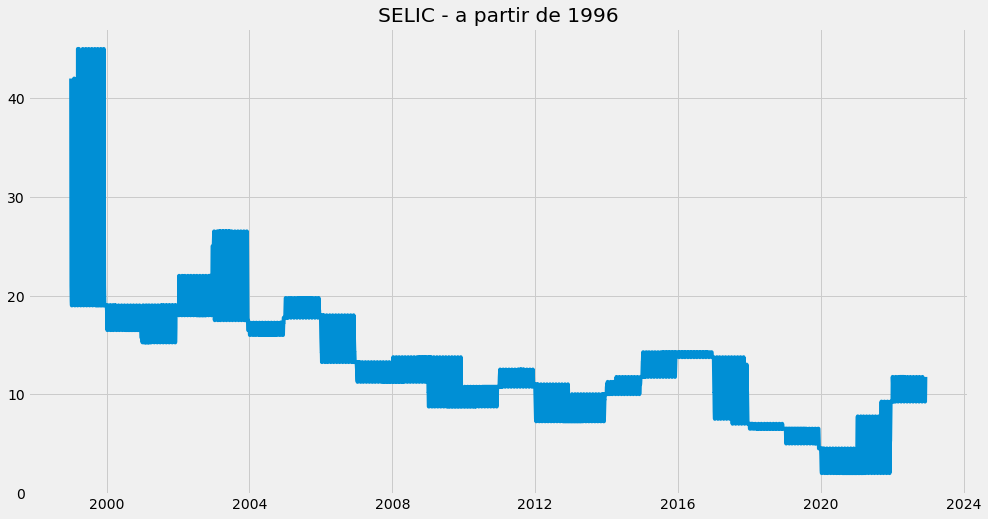

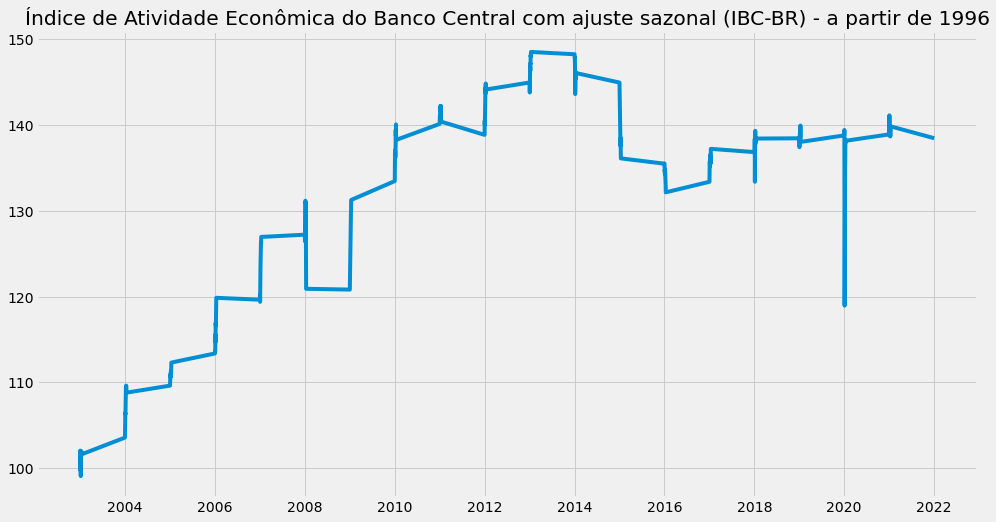

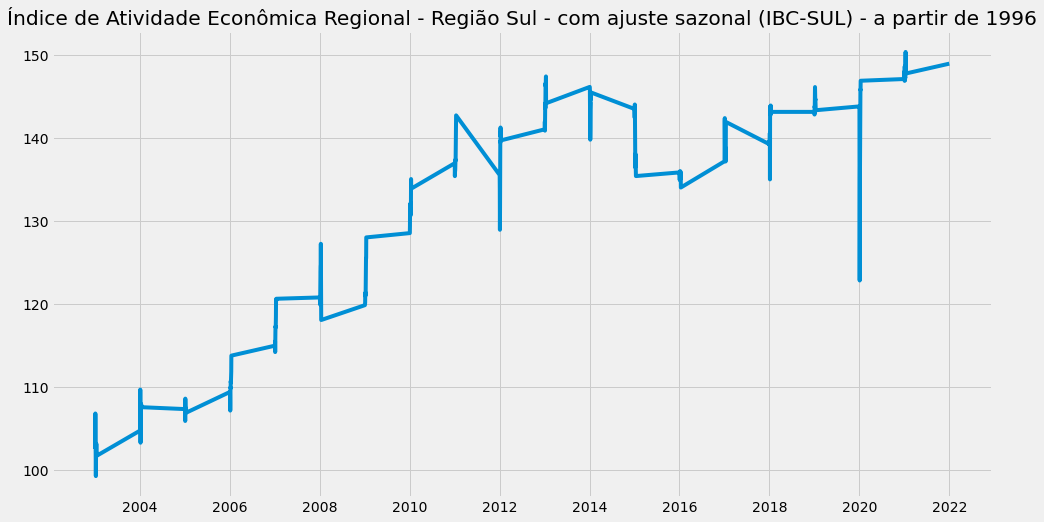

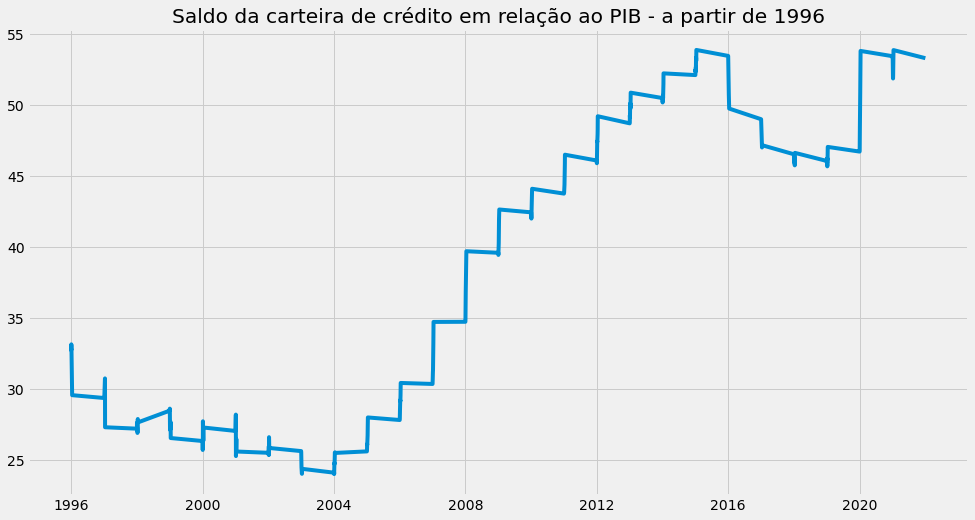

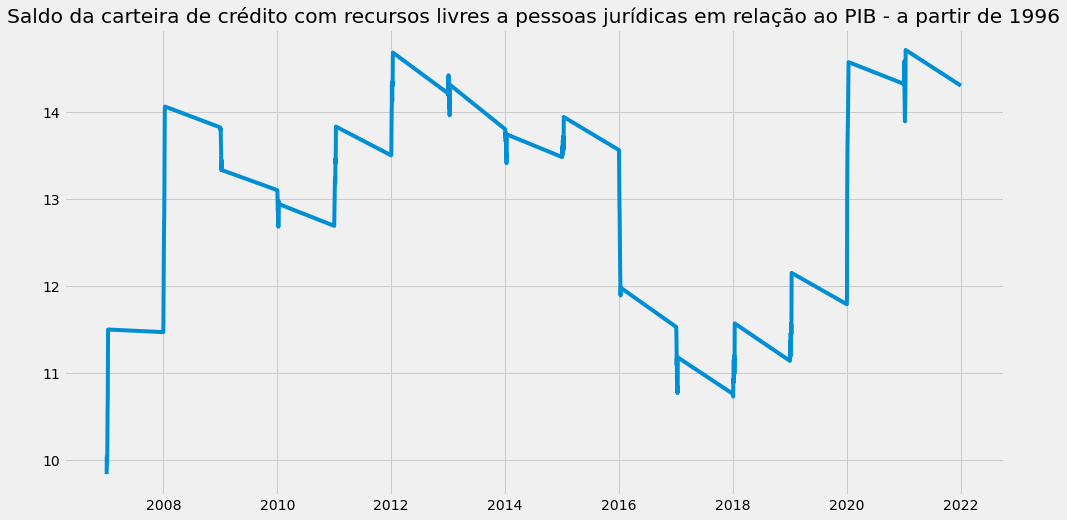

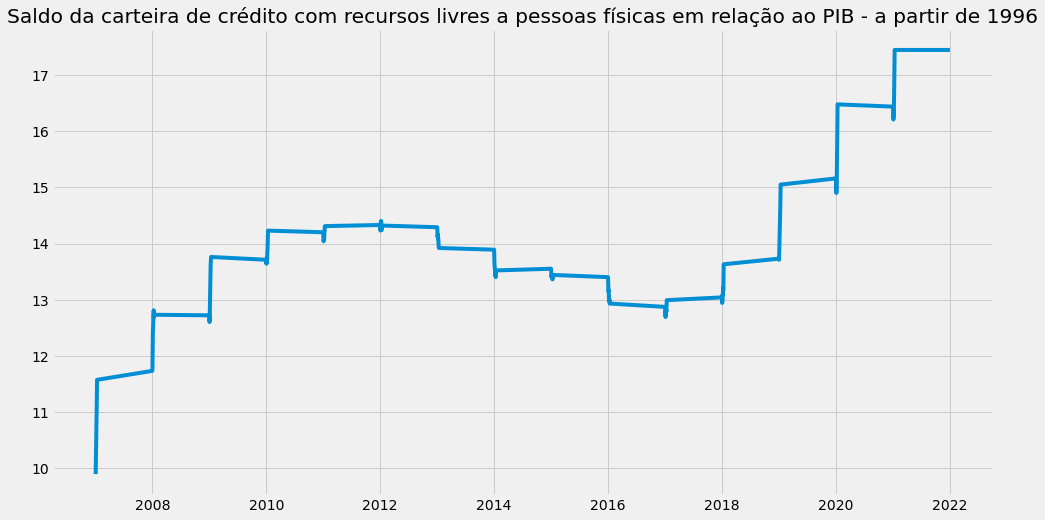

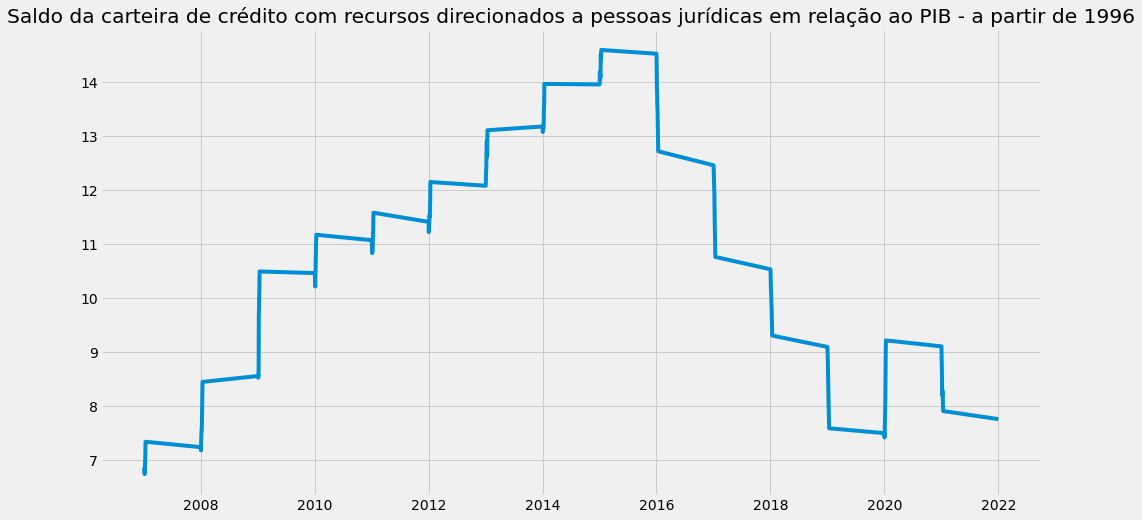

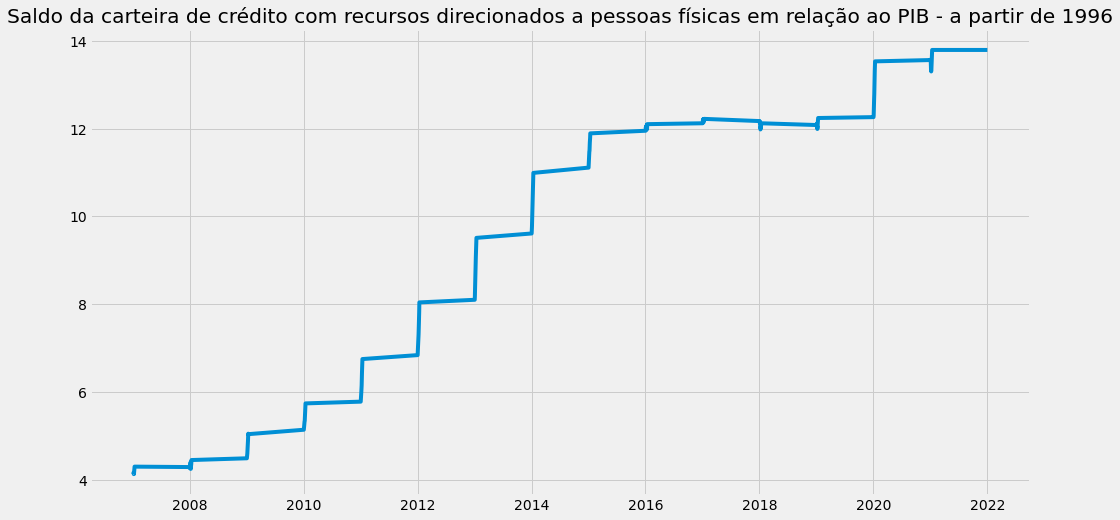

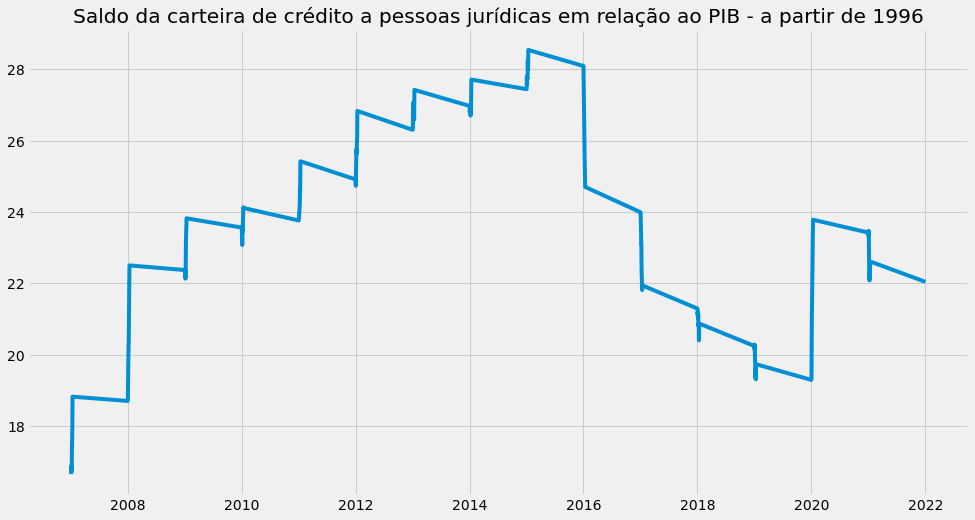

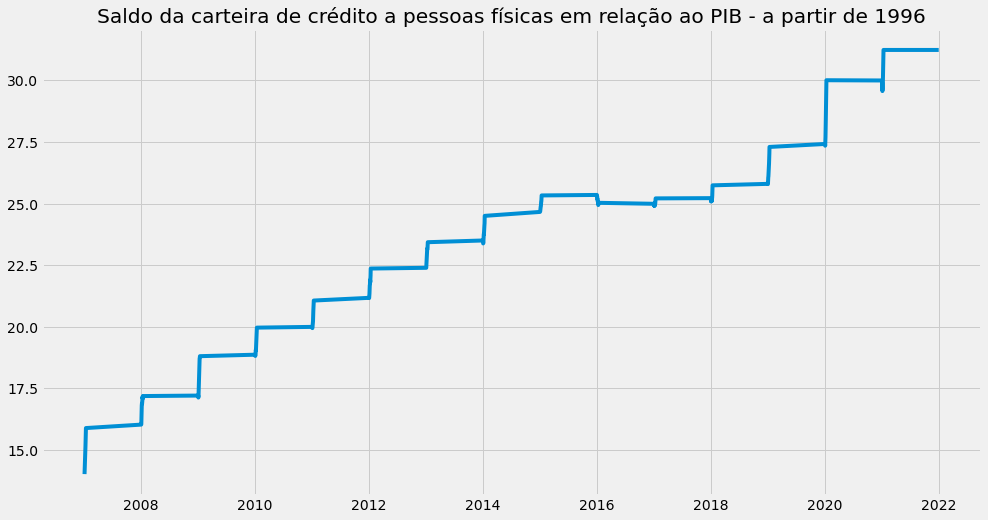

In [61]:
# PLOTAGEM DOS DADOS
for serie, df in bacen_dict.items():
    df_subset = df.dropna()["1996-01-01":]
    if df_subset.empty:
        continue
    else:
        plt.figure(figsize = (15,8))
        plt.plot(df_subset)
        plt.title(serie + " - a partir de 1996")

INFLAÇÃO ACUMULADA

In [66]:
# ÍNDICES UTILIZADOS
ipca = bacen_dict["Índice nacional de preços ao consumidor-amplo (IPCA)"]
igpm = bacen_dict["Índice geral de preços do mercado (IGP-M)"]

In [79]:
# FUNÇÃO PARA CALCULAR INFLAÇÃO ACUMULADA
def infl_acum(y, data1, data2 = None):
    if data2 == None:
        data2 = y.index.max()
    else:
        pass
    df_subset = y[data1 : data2]
    l = []
    for line_num, value in enumerate(df_subset):
        value1 = value/100
        if line_num == 0:
            l.append(value1)
        else:
            x0 = value1 + 1
            y_00 = l[line_num - 1]
            y_01 = (x0 * y_00) + value1
            l.append(y_01)
            inf_per = l[-1] 
    inf_per = l[-1] 
    return inf_per

In [84]:
# INFLAÇÃO ACUMULADA ENTRE 2015 E 2019
print("IGP-M:", infl_acum(igpm["valor"], "2015-01-01", "2019-12-31"))
print("IPCA:", infl_acum(ipca["valor"], "2015-01-01", "2019-12-31"))

IGP-M: 0.3603965500279214
IPCA: 0.3104544168795648


In [86]:
# INFLAÇÃO ACUMULADA DESDE 2020
print("IGP-M:", infl_acum(igpm["valor"], "2020-01-01"))
print("IPCA:", infl_acum(ipca["valor"], "2020-01-01"))

IGP-M: 0.5300798605169981
IPCA: 0.18714691459679575
